In [1]:
import numpy as np
import torch
import torch.nn as nn
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data_NN.csv",sep=";",header=0,names=("d1","d2","d3"),decimal=",")

In [3]:
X_data = np.concatenate((np.array([[-2,0,-1]]),data[:-1]), axis=0)
y_data = np.array(data)

n_features = np.size(X_data,1)
n_outputs = np.size(y_data,1)

x = torch.from_numpy(X_data)
y = torch.from_numpy(y_data)

In [4]:
# Defining input size, input layer size, hidden layer size, output size and batch size respectively
input_size, n_in, n_h, n_out, batch_size = n_features, 3, 3, n_outputs, 1000

In [5]:
# Create a model
model = nn.Sequential(
    nn.Linear(input_size,n_in),
    nn.Tanhshrink(),
    nn.Linear(n_in,n_h),
    nn.Tanhshrink(),
    nn.Linear(n_h,n_out),
    nn.Tanhshrink()).double()

In [6]:
# Construct the loss function
criterion = torch.nn.L1Loss()

# Construct the optimizer (Adamax in this case)
optimizer = torch.optim.Adamax(model.parameters(), lr = 0.0005, weight_decay=0.0005) 

In [7]:
# Gradient Descent
epochs = 50000
losses = []
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing x to the model
    prediction = model(x)

    # Compute and print loss
    error = criterion(prediction, y)
    y_pred, loss = prediction, error
    losses.append(loss.item())
    if epoch % (epochs/10) == (epochs/10-1):
        print('epoch: ', epoch,' loss: ', loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  999  loss:  13.345393929135268
epoch:  1999  loss:  1.2811271583725994
epoch:  2999  loss:  0.5599474357444193
epoch:  3999  loss:  0.41975333155691996
epoch:  4999  loss:  0.338445924414839
epoch:  5999  loss:  0.31493851838455617
epoch:  6999  loss:  0.28575488766364426
epoch:  7999  loss:  0.2615872653827842
epoch:  8999  loss:  0.25243970552557277
epoch:  9999  loss:  0.2438439630042782


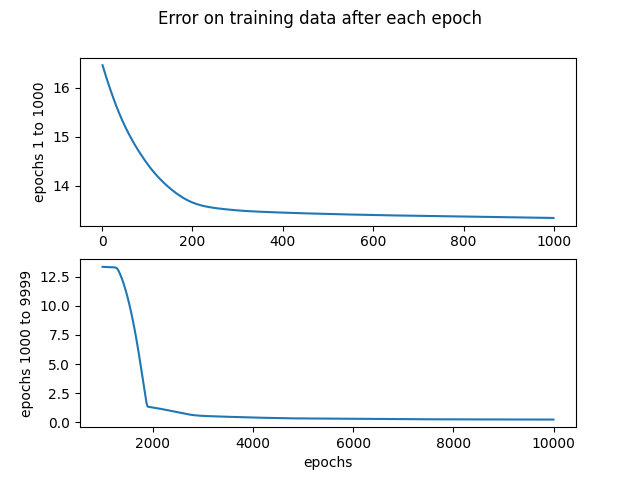

0.24380779914455294 0.2438439630042782


In [8]:
# visualizing the error after each epoch
cut = int(epoch*0.1)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Error on training data after each epoch')
ax1.plot(np.arange(1, cut+1), np.array(losses[:cut]))
ax1.set_ylabel('epochs 1 to %i' %(cut+1))
ax2.plot(np.arange(cut+1, epoch+1), np.array(losses[cut+1:]))
ax2.set_xlabel('epochs')
ax2.set_ylabel('epochs '+str(cut+1)+' to '+str(epoch))
plt.show()
print(np.array(losses).min(), losses[epoch])
y_predicted = y_pred.detach().numpy()

In [9]:
# 3D plotting
def d3plot(data, label, colour, title='3d plot'):
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(111,projection='3d')
    if (type(data) is not tuple): data, label, colour = (data,), (label,), (colour,)
    for i in range(len(data)):
        ax.plot3D((data[i])[:,0], (data[i])[:,1], (data[i])[:,2], colour[i], label=label[i])
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    return plt.show()

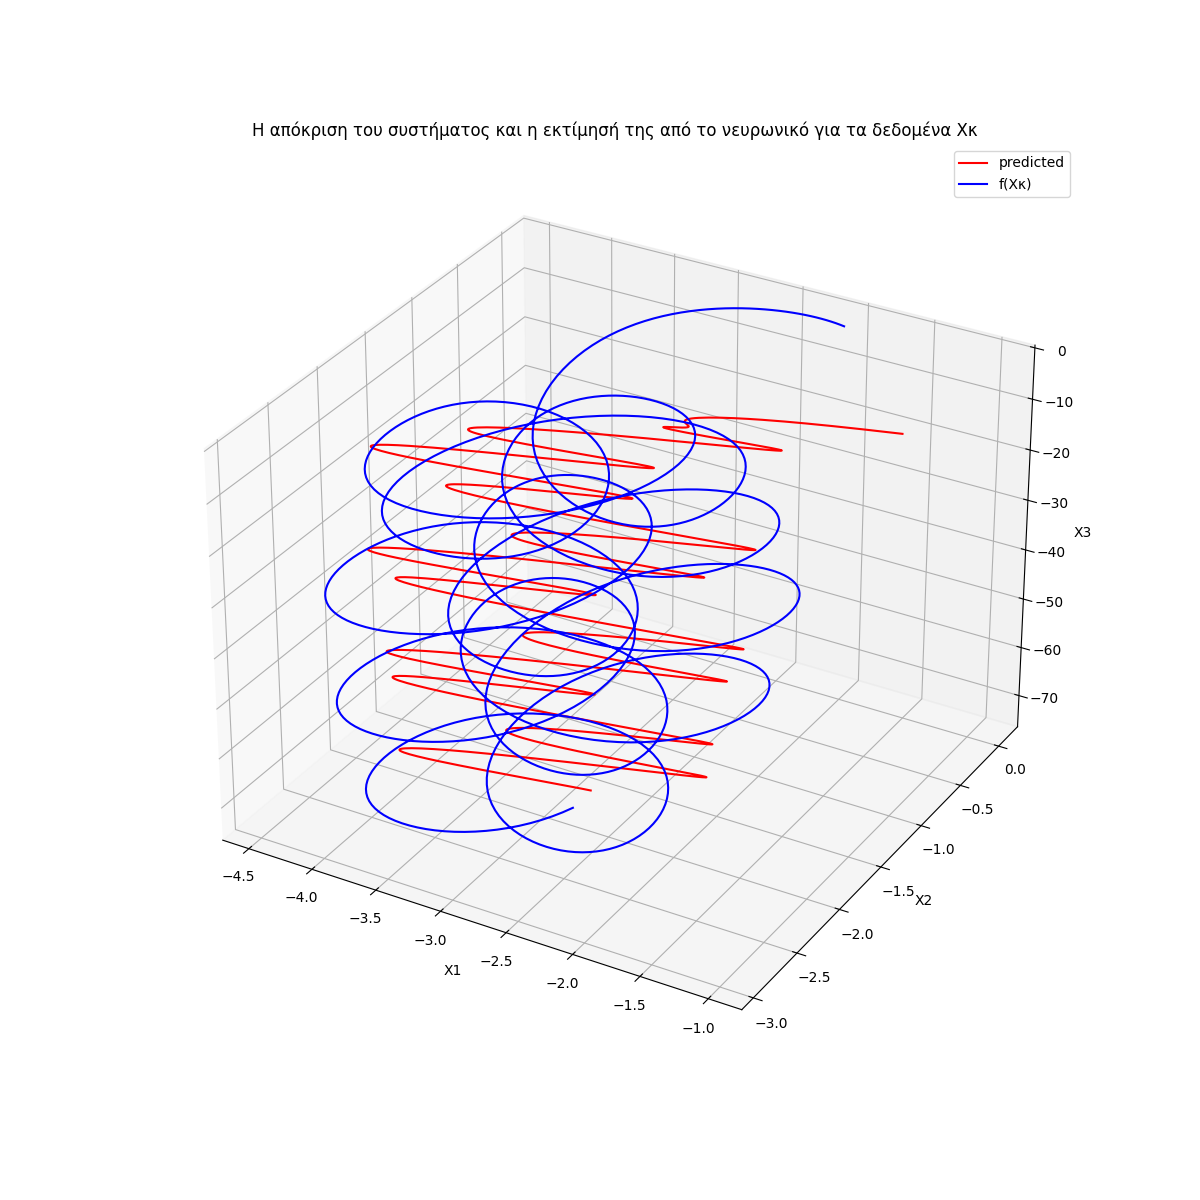

In [10]:
d3plot((y_predicted, y_data), label=('predicted','f(Xκ)'), colour=('r','b'), 
       title='Η απόκριση του συστήματος και η εκτίμησή της από το νευρωνικό για τα δεδομένα Xκ')

In [11]:
xk = torch.tensor([[-1.9, 0.0, -0.9]], dtype=torch.double)
x_val = []
steps = 200
for i in range(steps):
    xk = model(xk)
    x_val.append(xk.detach().numpy())
x_val = np.squeeze(x_val)

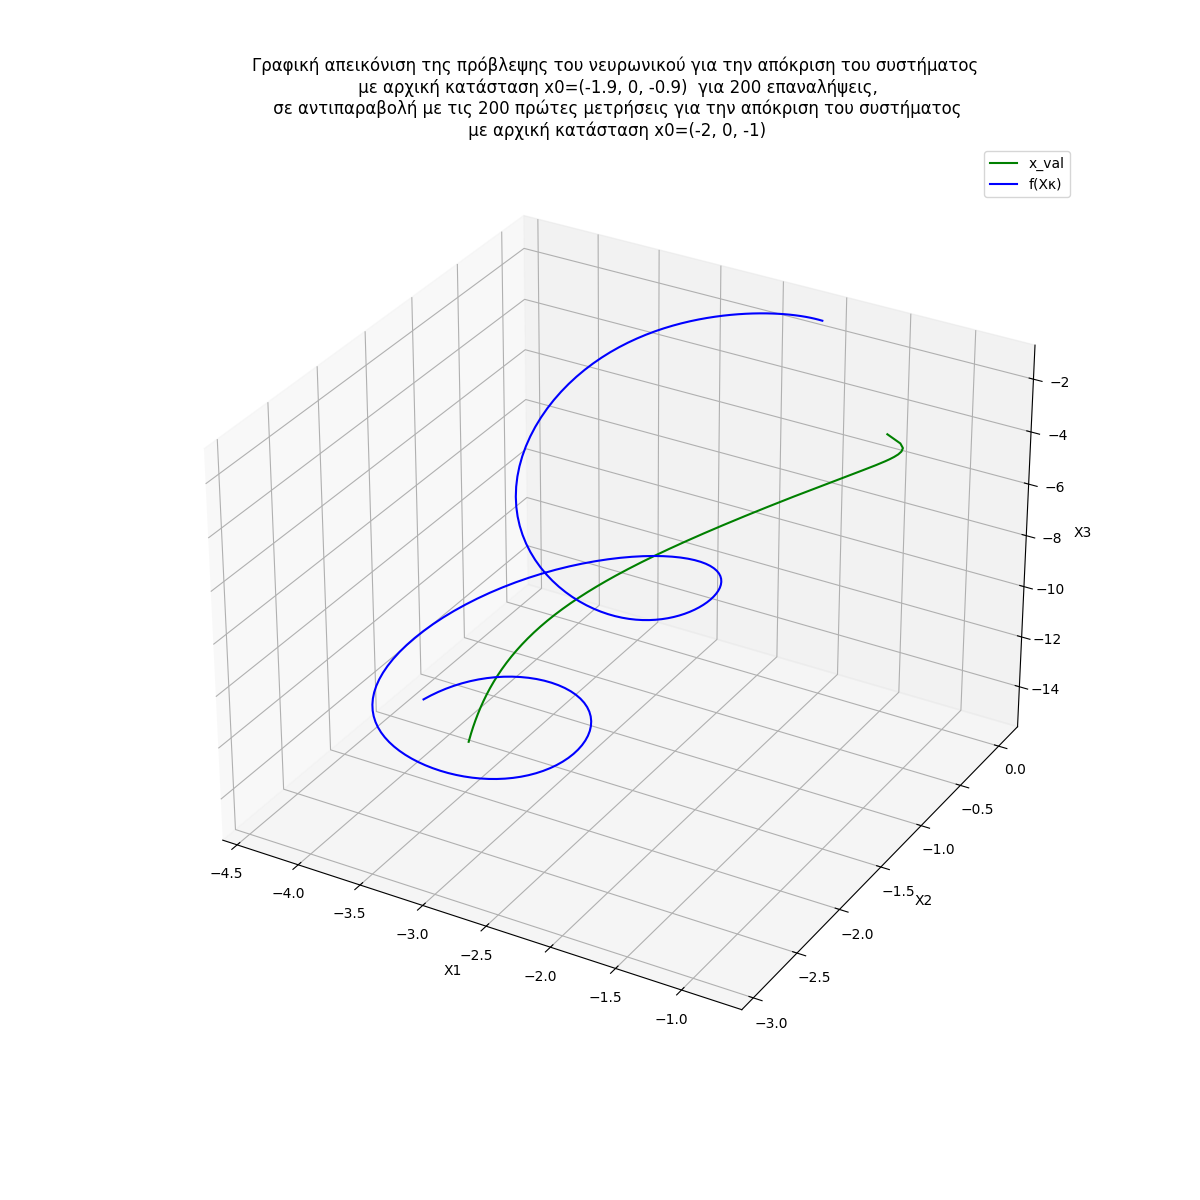

In [12]:
d3plot((x_val, y_data[:steps]), label=('x_val','f(Xκ)'), colour=('g','b'), 
        title='Γραφική απεικόνιση της πρόβλεψης του νευρωνικού για την απόκριση του συστήματος'
        '\n με αρχική κατάσταση x0=(-1.9, 0, -0.9)  για 200 επαναλήψεις,'
        '\n σε αντιπαραβολή με τις 200 πρώτες μετρήσεις για την απόκριση του συστήματος'
        '\n με αρχική κατάσταση x0=(-2, 0, -1)')